In [23]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

D = scipy.io.loadmat('allFaces.mat')
X = D['faces'] # 32256 x 2410, each column represents an image
y = np.ndarray.flatten(D['nfaces'])
m = int(D['m']) # 168
n = int(D['n']) # 192
n_persons = int(D['person']) # 38

/var/folders/z5/yzddplcs3m1frj6fgsrdm6f40000gn/T/ipykernel_5788/1883441251.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(D['m']) # 168
/var/folders/z5/yzddplcs3m1frj6fgsrdm6f40000gn/T/ipykernel_5788/1883441251.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(D['n']) # 192
/var/folders/z5/yzddplcs3m1frj6fgsrdm6f40000gn/T/ipykernel_5788/1883441251.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n_persons = int(D['person']) # 38


In [24]:
def show_montage(X, n, m, h, w):
#X: 影 像 資 料 矩 陣 ， 每 行 代 表 一 張 影 像
#n, m: 每 張 影 像 的 大 小 n x m
#h, w : 建 立 一 個 蒙 太 奇 圖 陣 ， 大小 figsize = (w,h)
    fig, axes = plt.subplots(h, w, figsize=(w, h))
    if X.shape[1] < w * h: # 影 像 張 數 不 到 w x h 張 ， 用 0 向量補齊
        X = np.c_[X, np.zeros((X.shape[0], w*h-X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:,i].reshape(m, n).T, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

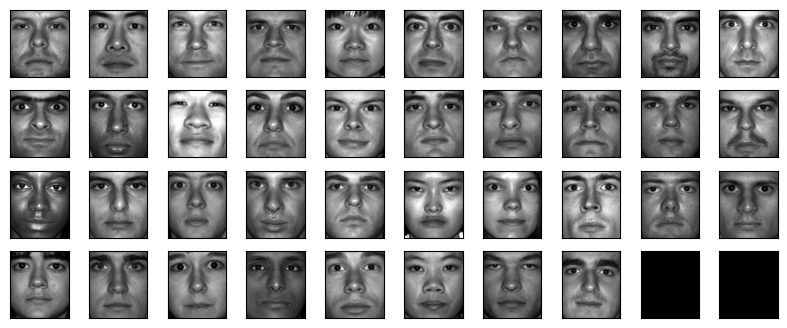

In [25]:
all_diff_persons = np.zeros((m*n, n_persons))
cnt = 0
for i in range(n_persons):
    all_diff_persons[:,i] = X[:,cnt]
    cnt = cnt + y[i]
show_montage(all_diff_persons , n, m, 4,10)

svd 分解

In [27]:
from numpy.linalg import svd 

# avgFace = X.mean(axis = 1).reshape(-1,1)
# X_avg = X - np.title(avgFace, (1, X.shape[1]))
avgFace = X.mean(axis = 1)
X_avg = X - avgFace.reshape(-1,1)
U, E, VT = svd(X_avg,full_matrices = False)
#U, E, VT = svd(X, full_matrices = False)

#X = (32256,2410)
#U = (32256,2410),VT=(2410,2410)

display the basis of eigenfaces 
- 組成人臉影像的基底向量（影像）
- 每張不同的人臉影像的差別僅在於組成基底向量的係數，即只需為每張影像保存其係數，外加這些基底。

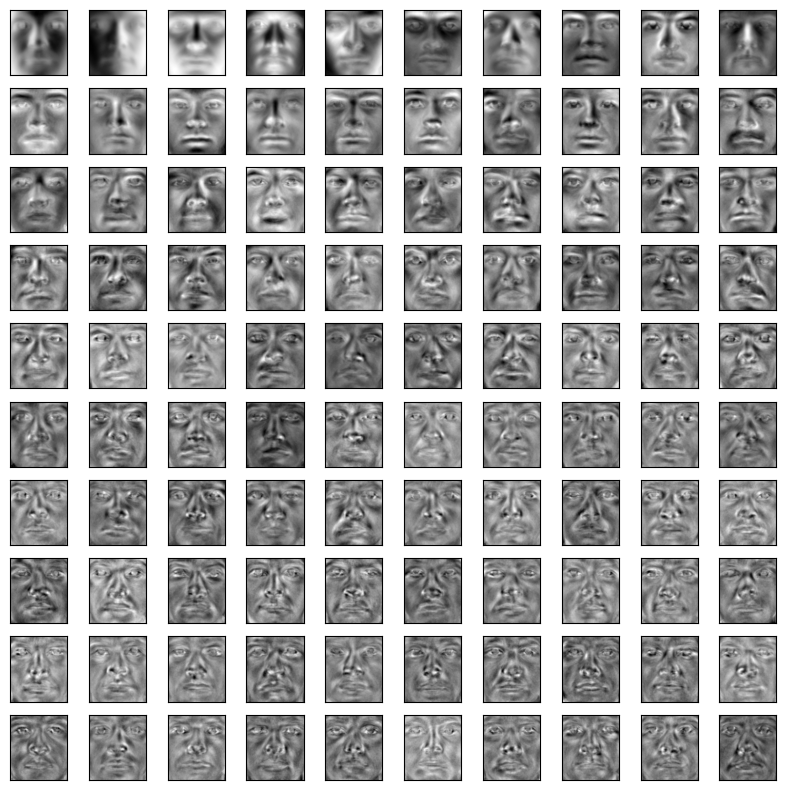

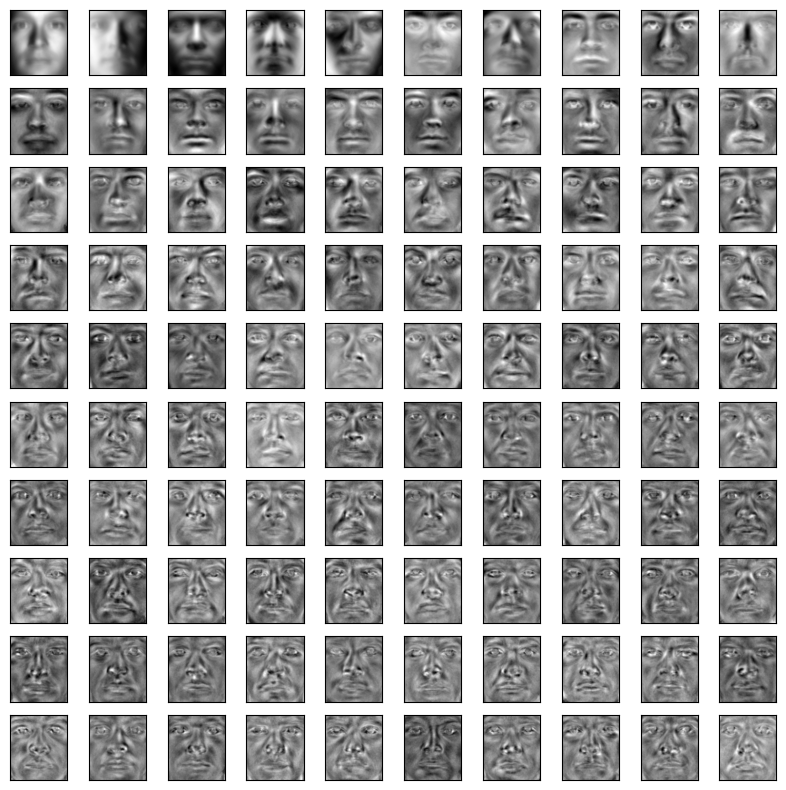

In [28]:
show_montage(U, n, m , 10, 10)
show_montage(255 - U, n ,m , 10 ,10) # 取相反的影像資料:255-
#任一張人臉可由這 100 張因素組成

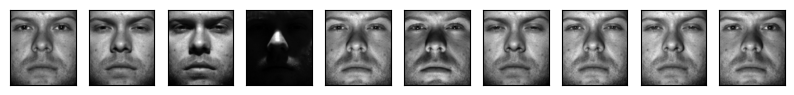

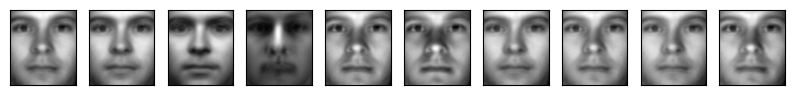

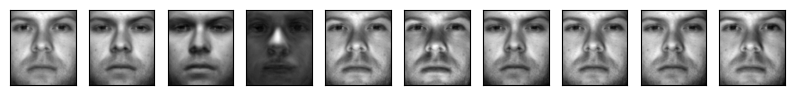

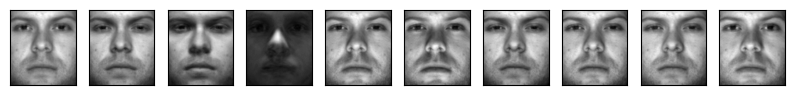

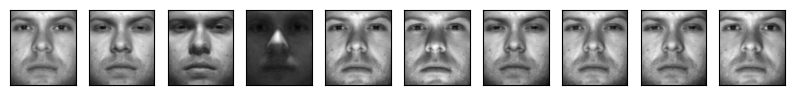

[112.1  22.4  11.2   5.6]


In [30]:
h , w = 1 ,10 
show_montage(X , n , m , h, w)
q = np.array([20,100,200,400])
for i in q :
    Uq = U[:,:i]
    Xq = Uq @ (Uq.T @ X[:, :h*w]) #Xq = UqUq^T X
    Xq = Xq + avgFace[:, np.newaxis]
    # Xq = Xq + np.tile(avgFace, (1, Xq.shape[1]))
    show_montage(Xq,n,m,h,w)

compress_ratio = (X.shape[0] * X.shape[1])/(X.shape[0]*q + q*X.shape[1])
print(np.round(compress_ratio,1))

範例4

<function matplotlib.pyplot.show(close=None, block=None)>

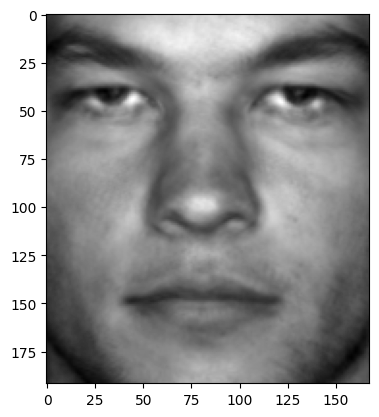

In [32]:
#測試1
q = 200 
x_new = X[:,np.sum(y[:36])]
x = U[:,0:q] @ (U[:,0:q].T @ x_new)
plt.imshow(x.reshape(m,n).T,cmap = 'gray')
plt.show

In [33]:
from numpy.linalg import svd 

U_BASE = 30
U , E , VT = svd(X_avg[:, :np.sum(y[:U_BASE])],full_matrices = False)

<function matplotlib.pyplot.show(close=None, block=None)>

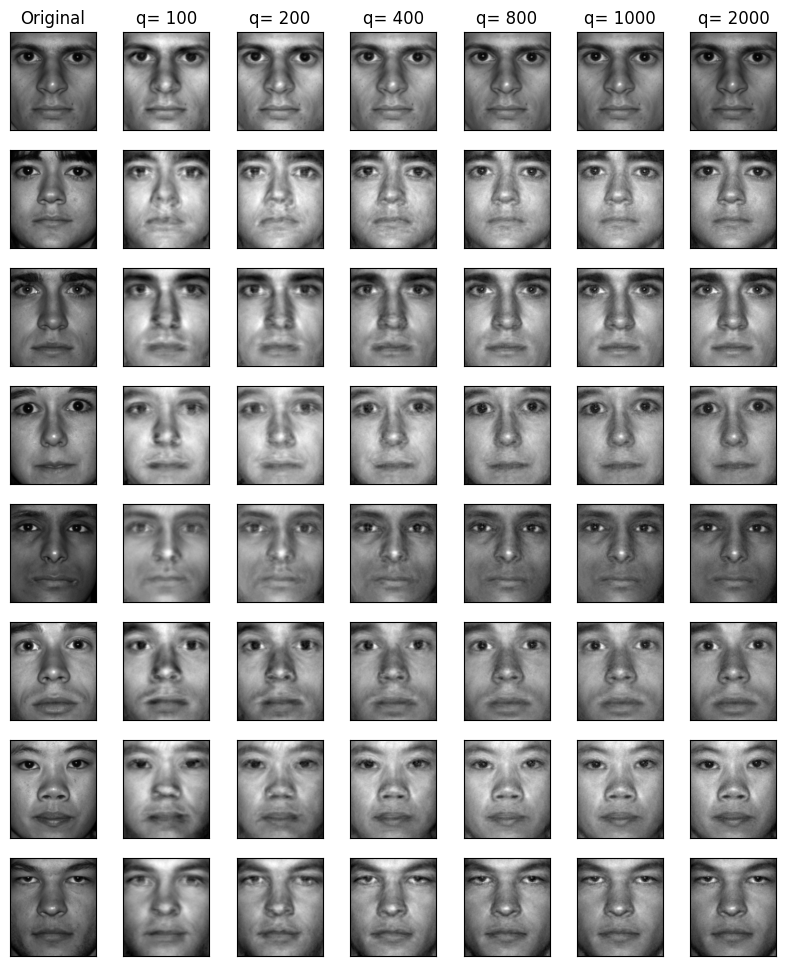

In [34]:
q = np.array([100 , 200 , 400 , 800 ,1000 , 2000])
new_pic = np.arange(30,38,1) #really new pictures
# new_pic = np.arange(10,18,1) # pictures that participate in creating U
fig , ax = plt.subplots(len(new_pic), len(q)+1 , figsize = (10,12))

for i in range(len(new_pic)):
    x_new = X[:,np.sum(y[:(new_pic[i]-1)])]
    ax[i][0].imshow((x_new).reshape(m,n).T,cmap='gray')
    ax[i][0].set_xticks([])
    ax[i][0].set_yticks([])
    ax[0][0].set_title('Original')

    for j , r in enumerate(q):
        x= U[:, 0:q[j]] @ (U[:, 0:q[j]].T @ x_new)
        ax[i][j+1].imshow((x).reshape(m,n).T , cmap='gray')
        ax[i][j+1].set_xticks([])
        ax[i][j+1].set_yticks([])
        if i == 0:
            ax[i][j+1].set_title('q= {}'.format(q[j]))
plt.show

#不參與svd 與 Ｕ 無關
#在q小的時候會還原得較好